In [1]:
import tensorflow as tf
import tensorflow
import matplotlib.pyplot as plt
import random as rand

print("Tensorflow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

Tensorflow version: 2.8.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0 , x_test / 255.0

x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")


4177
label 5


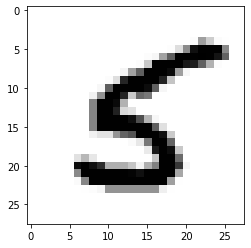

In [13]:
n = rand.randint(0,60000)
print(n)
example = x_train[n]
pixel_plot = plt.figure()

pixel_plot = plt.imshow(example,cmap='Greys')
plt.show
print(f"label {y_train[n]}")


In [15]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [16]:
class MyModel(Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32,3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128,activation='relu')
        self.d2 = Dense(10)
    
    def call(self, x):
        """generate """
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

model = MyModel()

In [17]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [18]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [19]:
@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [20]:
EPOCHS = 5

for epoch in range(EPOCHS):

    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
    )

Epoch 1, Loss: 0.253052681684494, Accuracy: 92.62166595458984, Test Loss: 0.10706517100334167, Test Accuracy: 96.83999633789062
Epoch 2, Loss: 0.09365084022283554, Accuracy: 97.23999786376953, Test Loss: 0.07323082536458969, Test Accuracy: 97.7199935913086
Epoch 3, Loss: 0.06819266825914383, Accuracy: 97.94166564941406, Test Loss: 0.07036250829696655, Test Accuracy: 97.72999572753906
Epoch 4, Loss: 0.05373324453830719, Accuracy: 98.3883285522461, Test Loss: 0.06958895921707153, Test Accuracy: 97.89999389648438
Epoch 5, Loss: 0.04372137039899826, Accuracy: 98.59666442871094, Test Loss: 0.07329381257295609, Test Accuracy: 97.93999481201172
